## Loading the libraries

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Loading the dataset

In [10]:
df = pd.read_csv('Position_Salaries.csv')

In [11]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [12]:
x = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

In [13]:
# x
# y

## Encoding categorical data

In [14]:
# # just encoding the feature "Position"

# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder

# ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [0])], remainder = 'passthrough')
# x = ct.fit_transform(x)

#......................................................................................................................
#because we have decided not to include the first column, wwe do not need to change it from categorical to numerical.

## Train-test splitting

In [15]:
#because our data is very few, we do not split into train and test sets.

## Model: Simple or Multiple Regression

In [21]:
#we do both the Simple(or Multiple) and the Polynomial regression to compare them (and later we see that the polynomial regression is a better model, since the dataset has non-linear relationships between its features.)

In [17]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Model: Polynomial Regression

In [41]:
#in polynomial regression, we don't have a unique, seperate class for this regression, instead we should:
#first) make vector [x1, x1^2, x1^3, ...x1^n] by "PolynomialFeatures"
#second) then we use "LinearRegression" for our model!


#first:
from sklearn.preprocessing import PolynomialFeatures

n = 4 #the more the degree n, the better the model. But allert) Overfitting!
poly_reg = PolynomialFeatures(degree = n) 
x_poly = poly_reg.fit_transform(x) #x: the ONE  feature we want as x1!

#second:
lin_reg_poly = LinearRegression()
lin_reg_poly.fit(x_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Visualisation

#### Visualising the Simple or Multiple Linear Regression

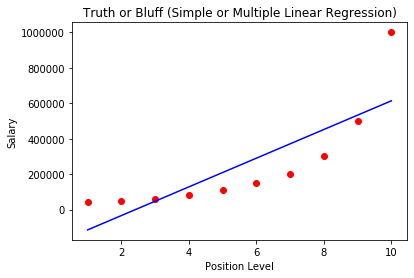

In [26]:
plt.scatter(x, y, color = 'red')
plt.plot(x, lin_reg.predict(x), color = 'blue')
plt.title('Truth or Bluff (Simple or Multiple Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

#### Visualising the Multiple Linear Regression

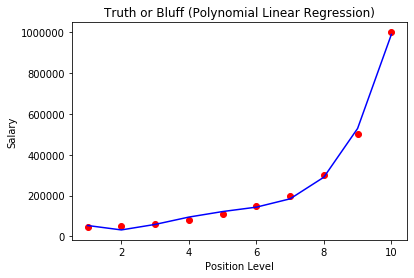

In [42]:
plt.scatter(x, y, color = 'red')
plt.plot(x, lin_reg_poly.predict(x_poly), color = 'blue') ##X_poly, NOT x.
plt.title('Truth or Bluff (Polynomial Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

## Visualising the Polynomial Regression results (for higher resolution and smoother curve)

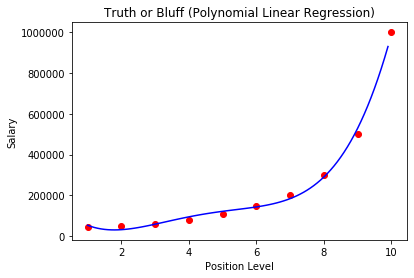

In [43]:
x_grid = np.arange(min(x), max(x), 0.1) #0.1: step
x_grid = x_grid.reshape(len(x_grid), 1)

plt.scatter(x, y, color = 'red')
plt.plot(x_grid, lin_reg_poly.predict(poly_reg.fit_transform(x_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

## Predect a new result with Simple(or Multiple) Linear Regression

In [49]:
# A new eployee who claims to be  manager, and we want to see whether the amount of salary he wants is truth or bluff!
# A manager's level in df is "6", but we consider this new employee more experienced since he is saying so!
# We want to consider him more than "6" because he claims to be a highly experinced manager, but we also can not consider him "7", since it is another position in the company. So we consider him as "6.5"!

print(lin_reg.predict([[6.5]])) #remember that the input arument for the ".predict()" method should be a 2D array.

[330378.78787879]


## Predect a new result with Polynomial Linear Regression

In [51]:
print(lin_reg_poly.predict(poly_reg.fit_transform([[6.5]])))

[158862.45265155]


In [ ]:
# So there is a big difference! That shows the importance of choosing the right model!